# Visualizando distribuições entre categorias

Ao analisar distribuições de dados, muitas vezes, é fundamental analisar e comparar como os valores estão distribuídos em relação a diferentes categorias presentes nos dados. A partir daí, é possível obter uma maior compreensão de cada categoria e dos padrões nos dados de forma geral. Por isso, a Visualização de Dados é uma ferramenta poderosa nesse processo.  
Iremos representar múltiplas distribuições de dados categóricos, utilizando as bibliotecas pandas, matplotlib e seaborn da linguagem Python.
- Representar distribuições categóricas com gráfico de dispersão categórico;
- Interpretar e criar gráficos de caixa para representar distribuições categóricas;
- Interpretar e criar gráficos de violino para representar distribuições categóricas

  Analisar como os valores de uma variável quantitativa estão distribuídos fornece uma importante compreensão sobre os dados. Para visualizar a distribuição de uma única variável, o histograma é uma ferramenta muito útil. Porém, quando existem variáveis categóricas, pode ser muito importante descobrir como os valores se distribuem em relação a cada categoria. Com isso, os histogramas podem ser usados para representar cada categoria separadamente, mas isso dificulta a **comparação entre distribuições**, que muitas vezes nos interessarão. Adotaremos técnicas que permitem visualizar e comparar distribuições categóricas em uma única visualização.

> Para análise iremos explorar um conjutno de dados reais sobre os passageiros que estiveram a bordo do Titanic.

In [2]:
# importando bibliotecas e estilos.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='darkgrid')

In [3]:
# carregando dados direto do seaborn.
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Iremos concentrar a nossa análise na idade (age), classe da passagem (class), sexo (sex) e se o passageiro sobreviveu ou não ao naufrágio (survived).
Usaremos um **gráfico de dispersão categórico**, pois este separa as categorias em um eixo. E o outro usa para mapear valores de uma variável quantitativa, representando cada dado como um ponto, cuja posição indica o valor da variável quantitativa. Esse gráfico pode ser criado através da função stripplot().

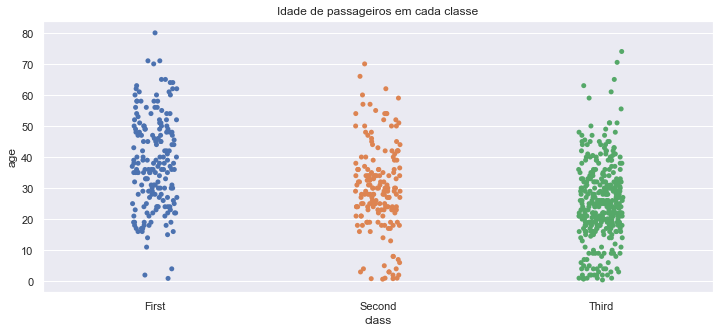

In [3]:
plt.figure(figsize=(12,5))
plt.title('Idade de passageiros em cada classe')
sns.stripplot(x='class', y='age', data=titanic)
plt.show()

- Já é possível ter uma noção comparativa entre as classes. Observar-se que a primeira classe possuía menos passageiros com menos de 20 anos. Devido ter muitos passageiros, ocorre muita sobreposição de pontos, e não se pode ter uma ideia objetiva, principalmente na terceira classe.  
isso pode ser melhorado usando o gráfico de enxame.  
Ele não sobrepõe os pontos e permite uma melor noção da quantidade de elementos em cada faixa de valores.

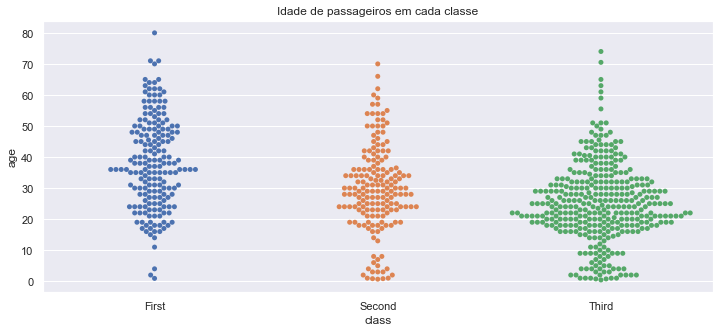

In [4]:
plt.figure(figsize=(12,5))
plt.title('Idade de passageiros em cada classe')
sns.swarmplot(x='class', y='age', data=titanic)
plt.show()

- O visual permite ter uma noção melhor da quantidade de passageiros em cada faixa de idade por classe.
- Pode-se observar que havia muito mais passageiros na terceira classe e que eram mais jovens e crianças, com poucos passageiros acima de 50 anos.
- A primeira classe possuia distribuiççao de idade mais uniforme, tendo mais pessoas de idade acima de 40 anos.
- Na segunda classe as idades são mais concentradas entre 20 a 40 anos.

Uma outra variável importante é quantos passageiros sobreviveram ou não ao naufrágio. Para representar essa variável, podemos mapeá-la para a cor, mas aí perderia a informação sobre os sexos. Então, uma alternativa para visualizar as duas variáveis, simultaneamente, é criar uma **grade de visualizações**, usando a função **catplot()**. Essa é uma função mais genérica, que pode ser usada para criar diferentes tipos de visualização, incluindo os gráficos de dispersão categóricos e de enxame. Porém, ela é baseada na classe FacetGrid do seaborn, que permite criar grades de gráficos.

C:\Users\adema\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


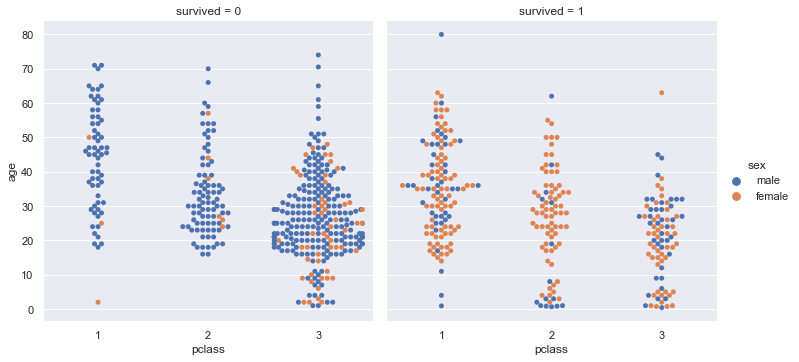

In [6]:
sns.catplot(x='pclass', y='age', hue='sex', col='survived', kind='swarm', data=titanic)

- Do lado direito, pode-se notar que a maioria dos sobreviventes são do sexo feminino. Verifica-se que muitas crianças sobreviveram, indicando que a regra de mulheres e crianças, primeiro, foi seguida em parte.  
- Nota-se também que houveram muitos mais sobreviventes na primeira classe em relação à terceira.

_O gráfico de enxame é útil para criar uma noção sobre a distribuição dos dados, mas ele possui limitações. Uma delas é a já mencionada falta de precisão ao se representar uma variável categórica pela cor. Outra limitação é que esse tipo de gráfico não se comporta bem para uma grande quantidade de dados, pois, conforme os dados aumentam, ele necessita de mais espaço para não sobrepor os pontos._

**Utilizando gráficos de caixa.**  
Um tipo de gráfico mais compacto que soluciona ambos os problemas é o gráfico de caixa.  
Ele fornece uma visualização compactada de uma distribuição de dados, além de ser bastante útil para representar múltiplas distribuições simultaneamente. Porém, a interpretação deste gráfico não é tão intuitiva. Assim, é necessário compreender o seu funcionamento.

In [5]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- As informações de valores estatísticos acima fornece informação da distribuição das variáveis. A ideia do gráfico de caixa é uma reprsentação visual padronizado dessas informações, através da dimensão de uma caixa em um eixo.

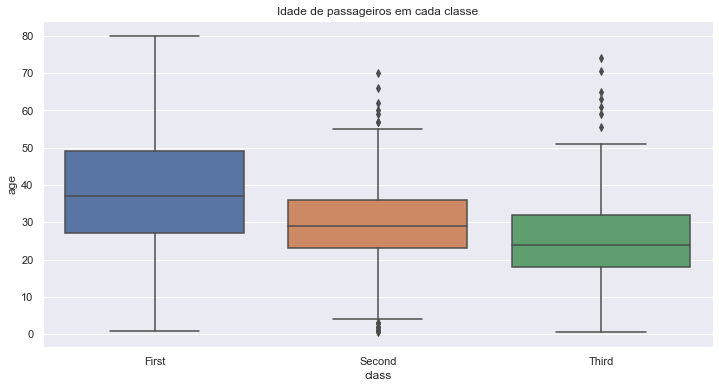

In [10]:
# gerando gráfico de caixa.
plt.figure(figsize=(12,6))
plt.title('Idade de passageiros em cada classe')
sns.boxplot(x='class', y='age', data=titanic)
plt.show()

- Uma das vantagens dos gráficos de caixa, além da sua simplicidade, é dar destaque na representação de outliers. Porém, a grande vantagem em relação ao gráfico de dispersão categórico se mostra ao se representar mais de uma variável categórica, como o sexo.

_Nota: Em um diagrama de caixa, é desenhada uma caixa do primeiro ao terceiro quartil. A reta que passa pela caixa representa o segundo quartil, ou mediana. Perceba que, dentro do intervalo da caixa, estão 50% dos dados, e esse intervalo é conhecido como **amplitude interquartil** (AIQ). As retas verticais acima e abaixo da caixa são chamados bigodes, e indicam a cauda da distribuição, ou seja, onde existem menos dados. Os limites dos bigodes são calculados por 1,5*AIQ e contêm cerca de 99% dos dados. Já os dados fora dos limites dos bigodes são dados raros, ou seja, exceções. Por isso, esses dados são representados por pontos e são chamados **outliers**, ou pontos discrepantes._

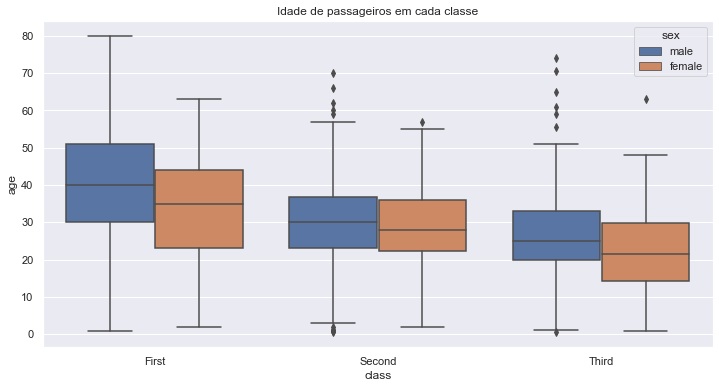

In [11]:
# incrementado parâmetro sexo.
plt.figure(figsize=(12,6))
plt.title('Idade de passageiros em cada classe')
sns.boxplot(x='class', y='age', hue='sex', data=titanic)
plt.show()

- Essa visualização permite ter uma noção comparativa sobre as distribuições de idade por sexo em cada classe. Pode-se perceber, por exemplo, que as mulheres são mais jovens do que os homens em todas as classes.

_O seaborn disponibiliza uma função que é uma variação do gráfico de caixa, chamada boxenplot(). A interpretação desse gráfico é a mesma, a diferença é que ele representa os bigodes com espessuras que permitem uma melhor percepção visual das quantidades de dados nas caudas._

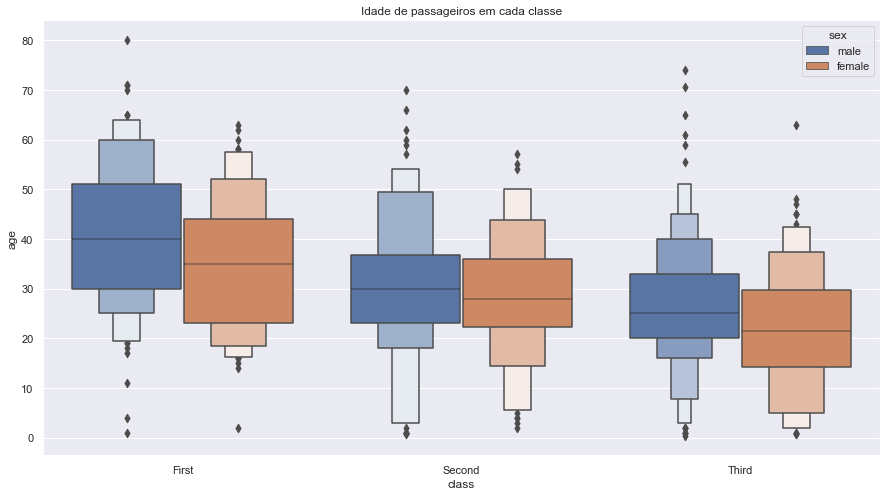

In [12]:
plt.figure(figsize=(15,8))
plt.title('Idade de passageiros em cada classe')
sns.boxenplot(x="class", y="age", hue = 'sex', data=titanic)
plt.show()

- Nesta forma dar-se uma maior ênfase visual aos bigodes. Comparando e analisando:
- Observa-se que os jovens masculinos menor que 20 anos na segunda classe são em maior quantidades.
- Observar-se que a distribuição de mulheres na terceira classe é maior.
- Na segunda classe homens e mulheres possuem idades bem próximas na distribução dos dados.

**Visualizando passageiros que sobreviveram ou não.**

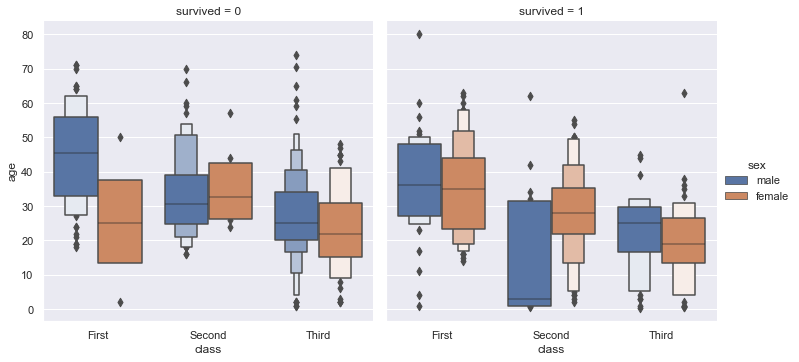

In [15]:
sns.catplot(x='class', y='age', hue='sex', col='survived', kind='boxen', data=titanic)

- Pode-se perceber que metade dos sobreviventes da segunda classe eram crianças;
- O gráfico de caixa fornece uma melhor noção geral sobre os intervalos das distribuições, onde se encontram os dados e os dados discrepantes;
- Em comparação o gráfico de enxame fornece uma noção sobre as quantidades e o formato da distribuição, que não é apresentada no gráfico de caixa.

**Gráficos de violino**  
O gráfico de violino é um tipo de gráfico de densidade.  
Ele representa uma distribuição de dados por uma **curva de probabilidade**, indicando os valores mais _prováveis_ para cada elemento. Essa curva é estimada através de um método conhecido como Estimativa de Densidade de Kernel (KDE). A curva é, então, espelhada, gerando uma forma simétrica que lembra um violino, de onde o gráfico tira o seu nome. Por isso, gráficos de violino combinam a visualização compacta do gráfico de caixa com a nuance da forma da distribuição do gráfico de enxame.

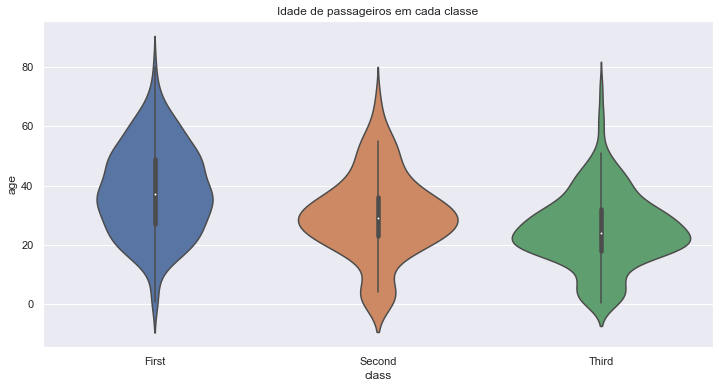

In [4]:
plt.figure(figsize=(12,6))
plt.title('Idade de passageiros em cada classe')
sns.violinplot(x='class', y='age', data=titanic)
plt.show()

- Note que o formato dos violinos lembra bastante os gráficos de enxame. Ou seja, com eles, pode-se visualizar as nuances da distribuição que, com os gráficos de caixa, não era possível. Porém, diferente do gráfico de dispersão, o gráfico de violino mostra **probabilidades**, e não os dados diretamente, como pontos. Isso significa que ele não sofre a limitação de precisar de mais espaço conforme aumentam os dados;
- Esse tipo de gráfico mostra um versão reduzida do gráfico de caixa, representado dentro de cada violino. Dessa maneira, o ponto branco, no meio, representa a mediana; a linha mais espessa representa a caixa; e as linhas menos espessas representam os bigodes;
- É possível combinar o gráfico de violino com o gráfico de enxame chamando as duas funções.(ver abaixo)

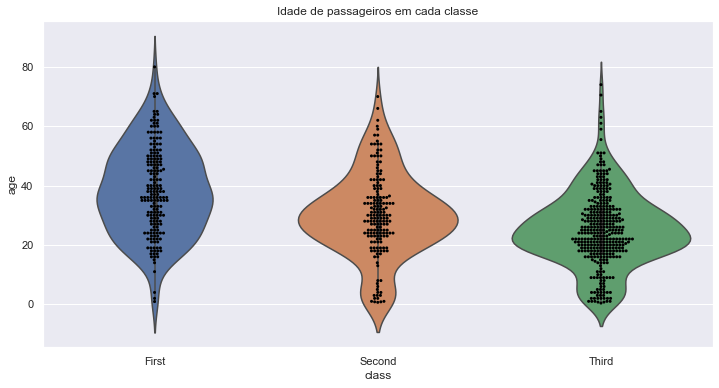

In [5]:
plt.figure(figsize=(12,6))
plt.title('Idade de passageiros em cada classe')
sns.violinplot(x='class', y='age', data=titanic)
sns.swarmplot(x='class', y='age', color='black', size=3, data=titanic)
plt.show()

- Iremos gerar uma visualização com a distribuição dos sexos, partindo o violino para representar uma curva de probabilidade de cada sexo no mesmo violino, ao invés de forma simetica.

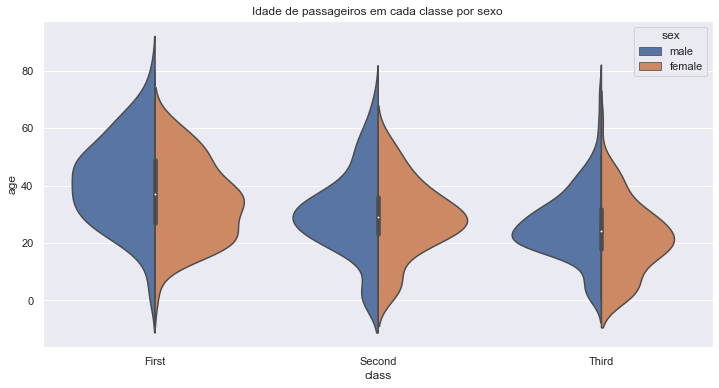

In [6]:
plt.figure(figsize=(12,6))
plt.title('Idade de passageiros em cada classe por sexo')
sns.violinplot(x='class', y='age', hue='sex', split=True, data=titanic)
plt.show()

- Partir os violinos permite um uso mais eficiente do espaço, representando mais informação, mas sem poluir a visualização.
- Podemos criar uma rade para visualizar os passageiros que sobreviveram e os que não sobreviveram.(abaixo)

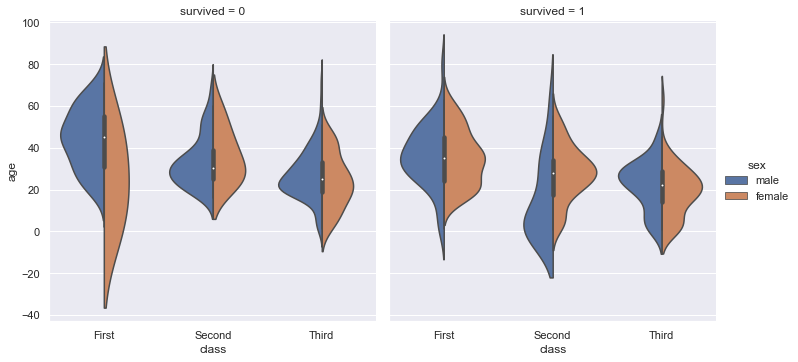

In [8]:
sns.catplot(x='class', y='age', hue='sex', col='survived', kind='violin', split=True, data=titanic)
plt.show()

- O gráfico traz atenção para a curva de probabilidade feminina da primeira classe dos não-sobreviventes, indicando que houveram muitas crianças do sexo feminino da primeira classe que não sobreviveram.  
- Perceba que o gráfico de violino, assim como o gráfico de caixa, não indica quantidades. Quando existem muitos dados, isso é desejado, mas quando há um menor número, pode ser mais interessante visualizar com o gráfico de enxame.

___

Neste estudo foram apresentados 3 tipos de gráficos para visualizar distribuições entre categorias. Esses três tipos foram utilizados para visualizar os mesmos dados e cada um revelou ou deu ênfase a diferentes padrões existentes nos dados.  
Perceba que cada um deles foca em questões diferentes, e o mais apropriado irá depender do objetivo da visualização. Então, isso é uma característica fascinante da área de visualização de dados, pois visualizações diferentes revelam alguns aspectos dos dados e ocultam outros. Portanto, é preciso avaliar qual é a mais vantajosa, especialmente, quando os dados possuem muitas variáveis que se relacionam entre si de diferentes formas.

Muitas vezes é útil utilizar mais de um tipo de visualização sobre os mesmos dados para descobrir ou transmitir a informação que se deseja.

**Glossário**  
**Amplitude interquartil**: Intervalo entre o primeiro e o terceiro quartil  
**Outliers**: São dados que fogem do padrão de um conjunto de dados, ou seja, são valores que estão muito afastados dos demais.
> 